## **IMPORTING THE LIBRARIES**

In [26]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

In [27]:
path = '/content/drive/MyDrive/CAPSTONE/Project/HENON CHAOTIC MAP/'
name = '2'
extension = '.png'

## **DEFINING THE FUNCTIONS TO IMPLEMENT H.M**

In [28]:
def getImageMatrix(location):
  image = Image.open(location, mode='r')
  pix = image.load()
  color = 1
  if type(pix[0,0]) == int:
    color = 0
  image_size = image.size
  image_matrix = []
  for width in range(int(image_size[0])):
    row = []
    for height in range(int(image_size[1])):
      row.append((pix[width, height]))
    image_matrix.append(row)
  return image_matrix , image_size[0], image_size[1], color

In [29]:
# FUNCTION TO GET GRAY IMAGE MATRIX
def getImageMatrix_gray(location):
  image = Image.open(location, mode='r').convert('LA')
  pix = image.load()
  image_size = image.size
  image_matrix = []
  for width in range(int(image_size[0])):
    row = []
    for height in range(int(image_size[1])):
      row.append((pix[width, height]))
    image_matrix.append(row)
  return image_matrix, image_size[0], image_size[1]

In [30]:
def dec(bitSequence):
  decimal=0
  for bit in bitSequence:
    decimal = decimal*2 + int(bit)
  return decimal

In [31]:
def genHenonMap(dimension, key):
  x = key[0]
  y = key[1]

  # 'sequenceSize' is the total number of bitSequence produced
  sequenceSize = (dimension*dimension*8)

  # Each bitSequence contains 8 bits
  bitSequence = []

  # Each byteArray contains m (i.e., 512 in this case) bitSequence
  byteArray = []

  # Each TImageMatrix contains m*n byteArray (i.e., 512 byteArray in this case)
  TImageMatrix = []

  for i in range(sequenceSize):
    xN = y + 1 - 1.4*x**2
    yN = 0.3*x

    x = xN
    y = yN

    if xN <= 0.4:
      bit = 0
    else:
      bit = 1

    try: 
      bitSequence.append(bit)   # if bitSequence not empty then append
    except:
      bitSequence = [bit]       # else if empty the bitSequence = [bit]

    if i%8==7:                  # when all the 8 bits are generated
      decimal = dec(bitSequence)    # convert sequence to decimal
      try:
        byteArray.append(decimal)
      except:
        byteArray = [decimal]
      
      bitSequence = []

    byteArraySize = dimension*8

    if i%byteArraySize == byteArraySize-1:
      try:
        TImageMatrix.append(byteArray)
      except:
        TImageMatrix = [byteArray]
      byteArray = []
  return TImageMatrix

In [32]:
# Implementing Henon Encryption
def HenonEncryption(imageName, key):
    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageName)
    transformationMatrix = genHenonMap(dimension, key)
    resultantMatrix = []

    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            resultantMatrix.append(row)
        except:
            resultantMatrix = [row]
        
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else:
        im = Image.new("L", (dimensionX, dimensionY))       # L is for black and white pixels

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = resultantMatrix[x][y]
    im.save(path + "Encrypted_" + name + extension)

In [33]:
# Henon Decryption
def HenonDecryption(imageNameEnc, key):
    imageMatrix, dimensionX, dimensionY, color = getImageMatrix(imageNameEnc)
    transformationMatrix = genHenonMap(dimension, key)
    pil_im = Image.open(imageNameEnc, 'r')
    henonDecryptedImage = []
    for i in range(dimensionX):
        row = []
        for j in range(dimensionY):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimensionX, dimensionY))
    else: 
        im = Image.new("L", (dimensionX, dimensionY)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimensionX):
        for y in range(dimensionY):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(path + "Decrypted_" + name + extension)

In [34]:
# THE KEY.
key = (0.90,0.10)

## **THE ORIGINAL IMAGE**

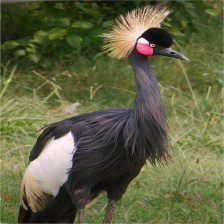

In [35]:
original_image = cv2.imread(path+name+extension)
cv2_imshow(original_image)

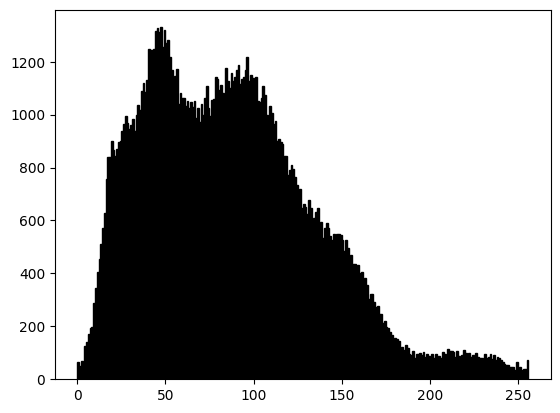

In [36]:
# HISTOGRAM OF ORIGINAL IMAGE
plt.hist(original_image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

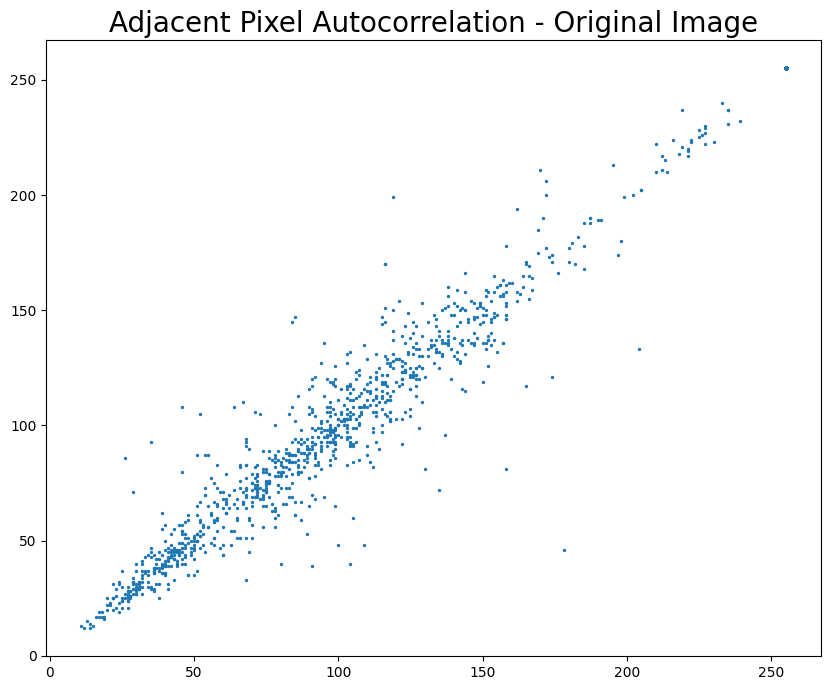

In [37]:
# Original Image
ImageMatrix,image_size,color = getImageMatrix_gray(path+name+extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

## **ENCRYPTION**

In [38]:
rows, cols, ch = original_image.shape
dimension = rows
dimension

224

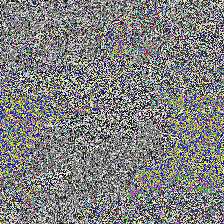

In [39]:
# Encryption
HenonEncryption(path + name + extension, key)
encrypted_image = cv2.imread(path + "Encrypted_"+name + extension)
cv2_imshow(encrypted_image)

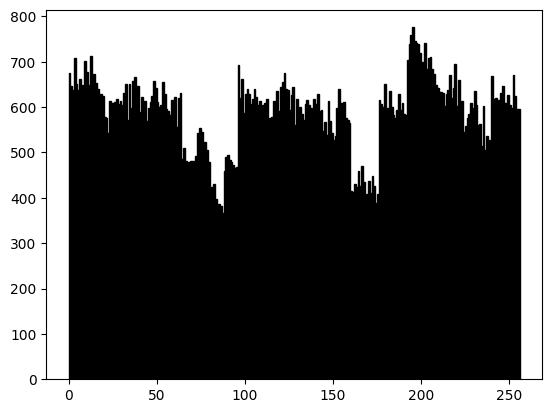

In [40]:
# HISTOGRAM OF ENCRYPTED IMAGE
plt.hist(encrypted_image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

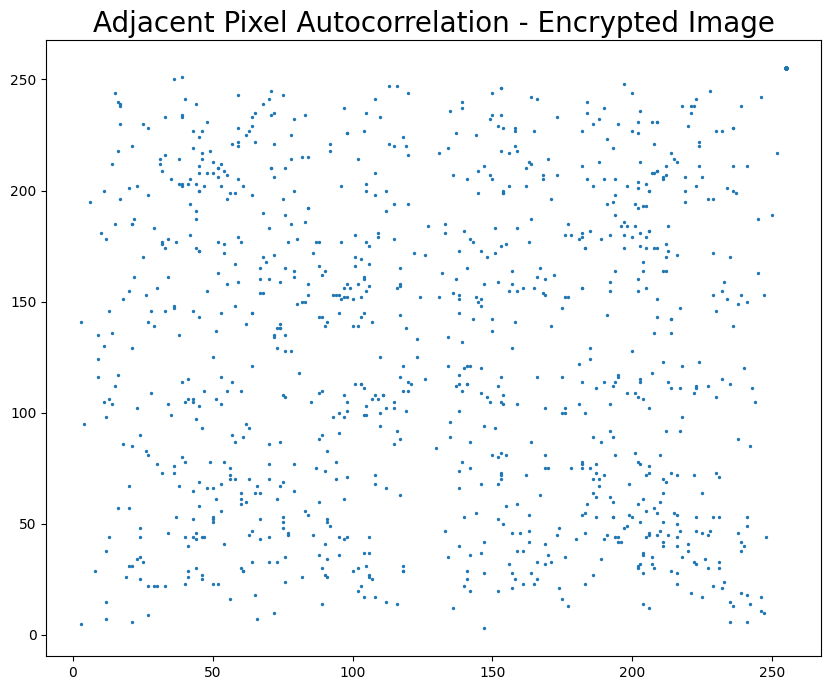

In [41]:
# Encrypted Image
ImageMatrix,image_size,color = getImageMatrix_gray(path + "Encrypted_"+name + extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Encrypted Image', fontsize=20)
plt.show()

## **DECRYPTION**

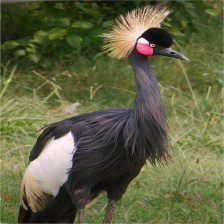

In [42]:
HenonDecryption(path + "Encrypted_" + name + extension, key)
decrypted_image = cv2.imread(path + "Decrypted_" + name + extension)
cv2_imshow(decrypted_image)

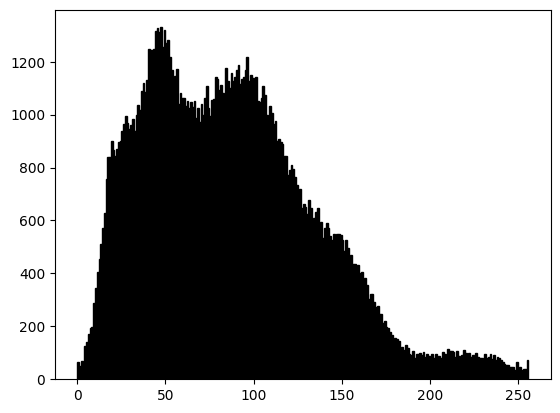

In [43]:
# HISTOGRAM OF DECRYPTED IMAGE
plt.hist(decrypted_image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

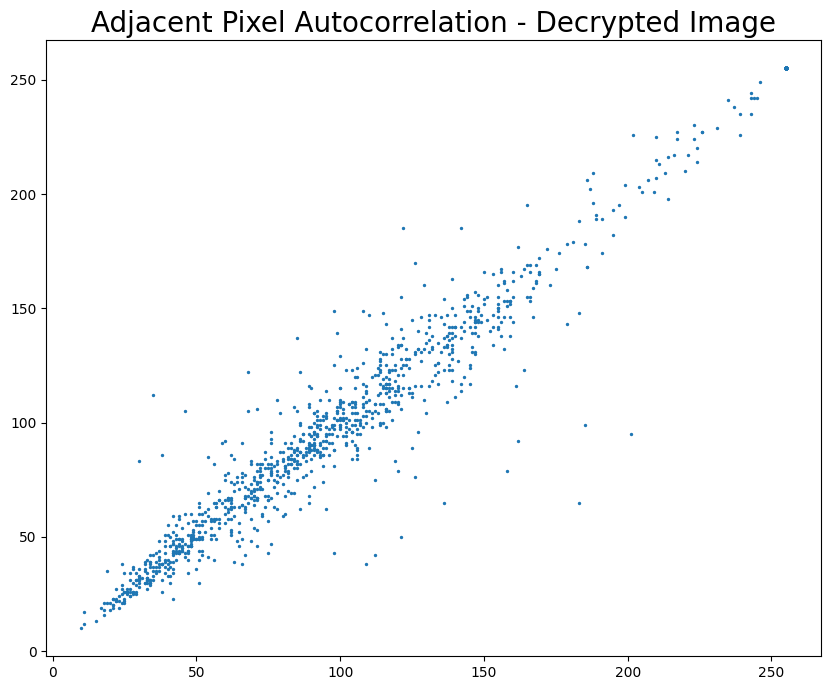

In [44]:
# Decrypted Image
ImageMatrix,image_size,color = getImageMatrix_gray(path + "Decrypted_"+name + extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Decrypted Image', fontsize=20)
plt.show()

## **CALCULATING THE CORRELATION COEFFICIENT**

In [45]:
from numpy import asarray

In [46]:
# GENERATING THE ORIGINAL IMAGE ARRAY
original_image_array = cv2.imread(path + name + extension)
original_image_array = asarray(original_image_array)
original_image_array = original_image_array.reshape(-1)

In [47]:
# GENERATINGTHE ENCRYPTED IMAGE ARRAY
encrypted_image_array = cv2.imread(path + "Encrypted_" + name + extension)
encrypted_image_array = asarray(encrypted_image_array)
encrypted_image_array = encrypted_image_array.reshape(-1)

In [48]:
# GENERATINGTHE DECRYPTED IMAGE ARRAY
decrypted_image_array = cv2.imread(path + "Decrypted_" + name + extension)
decrypted_image_array = asarray(decrypted_image_array)
decrypted_image_array = decrypted_image_array.reshape(-1)

In [49]:
# ORIGINAL VS ENCRYPTED CORRELATION COEFFICIENT
np.corrcoef(original_image_array, encrypted_image_array)

array([[ 1.        , -0.00138243],
       [-0.00138243,  1.        ]])

In [50]:
# ORIGINAL VS DECRYPTED CORRELATION COEFFICIENT
np.corrcoef(original_image_array, decrypted_image_array)

array([[1., 1.],
       [1., 1.]])